In [ ]:
import cv2
import numpy as np
from pathlib import Path

In [ ]:
BODY_PARTS = {"Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
                "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
                "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "REye": 14,
                "LEye": 15, "REar": 16, "LEar": 17}

POSE_PAIRS = [["Neck", "RShoulder"], ["Neck", "LShoulder"], ["RShoulder", "RElbow"],
              ["RElbow", "RWrist"], ["LShoulder", "LElbow"], ["LElbow", "LWrist"],
              ["Neck", "RHip"], ["RHip", "RKnee"], ["RKnee", "RAnkle"], ["Neck", "LHip"],
              ["LHip", "LKnee"], ["LKnee", "LAnkle"], ["Neck", "Nose"], ["Nose", "REye"],
              ["REye", "REar"], ["Nose","LEye"], ["LEye", "LEar"], ["RShoulder", "LEar"],
              ["LShoulder", "REar"]]

In [ ]:
protoFile = "/content/openpose/models/pose/coco/pose_deploy_linevec.prototxt"
weightsFile = "/content/openpose/models/pose/coco/pose_iter_440000.caffemodel"

net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

In [ ]:
# original_image = cv2.imread("/content/Picture1.png")
# image = cv2.resize(original_image, (original_image.shape[0]//2, original_image.shape[0]//2), interpolation = cv2.INTER_CUBIC)

image = cv2.imread("/content/Picture1.png")

In [ ]:
imageHeight, imageWidth, _ = image.shape

inpBlob = cv2.dnn.blobFromImage(image, 1.0 / 255, (imageWidth, imageHeight), (0, 0, 0), swapRB=False, crop=False)

net.setInput(inpBlob)
output = net.forward()

In [ ]:
vector_image = np.zeros_like(image)
vector_image.fill(255)

In [ ]:
H = output.shape[2]
W = output.shape[3]

points = []
for i in range(18):
    probMap = output[0, i, :, :]

    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

    x = (imageWidth * point[0]) / W
    y = (imageHeight * point[1]) / H

    if prob > 0.05 :
        cv2.circle(image, (int(x), int(y)), 3, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
        cv2.circle(vector_image, (int(x), int(y)), 3, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
        cv2.putText(image, f"{i}", (int(x), int(y)), cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.5, (0, 0, 255), 1, lineType=cv2.LINE_AA)
        cv2.putText(vector_image, f"{i}", (int(x), int(y)), cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.5, (0, 0, 255), 1, lineType=cv2.LINE_AA)
        points.append((int(x), int(y)))
    else :
        points.append(None)

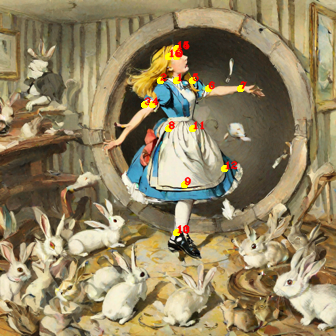

In [ ]:
cv2_imshow(image)

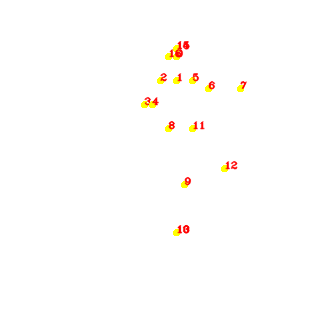

In [ ]:
cv2_imshow(vector_image)

In [ ]:
imageCopy = image
imageCopy_vector = vector_image

for pair in POSE_PAIRS:
    partA = pair[0]
    partA = BODY_PARTS[partA]
    partB = pair[1]
    partB = BODY_PARTS[partB]

    if points[partA] and points[partB]:
        cv2.line(imageCopy, points[partA], points[partB], (0, 255, 0), 2)
        cv2.line(imageCopy_vector, points[partA], points[partB], (0, 255, 0), 2)

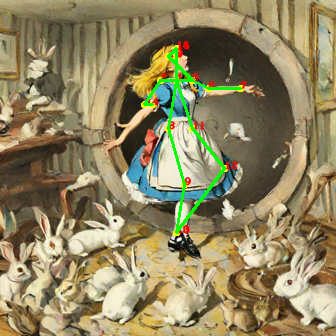

In [ ]:
cv2_imshow(imageCopy)

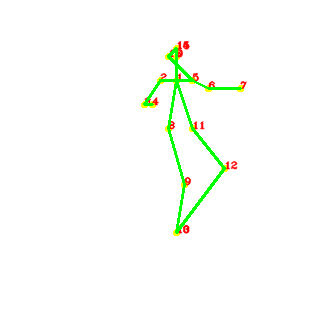

In [ ]:
cv2_imshow(imageCopy_vector)

In [ ]:
rendered_path = Path("/content/drive/MyDrive/kist_data/rendered")
png_files = rendered_path.glob("*.png")

In [ ]:
for png_file in png_files:
  original_image = cv2.imread(os.path.abspath(png_file))
  image = cv2.resize(original_image, (original_image.shape[0]//2, original_image.shape[0]//2), interpolation = cv2.INTER_CUBIC)

  imageHeight, imageWidth, _ = image.shape

  inpBlob = cv2.dnn.blobFromImage(image, 1.0 / 300, (imageWidth, imageHeight), (0, 0, 0), swapRB=False, crop=False)

  net.setInput(inpBlob)
  output = net.forward()

  vector_image = np.zeros_like(image)
  vector_image.fill(255)

  H = output.shape[2]
  W = output.shape[3]

  points = []
  for i in range(18):
      probMap = output[0, i, :, :]

      minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

      x = (imageWidth * point[0]) / W
      y = (imageHeight * point[1]) / H

      if prob > 0.05 :
          cv2.circle(image, (int(x), int(y)), 3, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
          cv2.circle(vector_image, (int(x), int(y)), 3, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
          cv2.putText(image, f"{i}", (int(x), int(y)), cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.5, (0, 0, 255), 1, lineType=cv2.LINE_AA)
          cv2.putText(vector_image, f"{i}", (int(x), int(y)), cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.5, (0, 0, 255), 1, lineType=cv2.LINE_AA)
          points.append((int(x), int(y)))
      else :
          points.append(None)

  cv2.imwrite(png_file.stem+"_overlay"+png_file.suffix, image)
  cv2.imwrite(png_file.name, vector_image)

  imageCopy = image
  imageCopy_vector = vector_image

  for pair in POSE_PAIRS:
      partA = pair[0]
      partA = BODY_PARTS[partA]
      partB = pair[1]
      partB = BODY_PARTS[partB]

      if points[partA] and points[partB]:
          cv2.line(imageCopy, points[partA], points[partB], (0, 255, 0), 2)
          cv2.line(imageCopy_vector, points[partA], points[partB], (0, 255, 0), 2)
  cv2.imwrite(png_file.stem+"_pose"+png_file.suffix, imageCopy_vector)